<a href="https://colab.research.google.com/github/wiv33/A-Learning-python/blob/master/machine-learning/_000_hello_machine/_000_basic/_006_multi_camp_tf_2_0/_001_tf_2_vgg16.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import matplotlib.pylab as plt
import tensorflow as tf
from tensorflow import keras

cifar10 = keras.datasets.cifar10

In [3]:
(train_data, train_labels), (test_data, test_labels) = cifar10.load_data()

train_dataset = tf.data.Dataset.from_tensor_slices((train_data, train_labels))
test_dataset = tf.data.Dataset.from_tensor_slices((test_data, test_labels))


170500096/170498071 [==============================] - 11s 0us/step


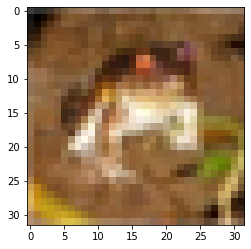

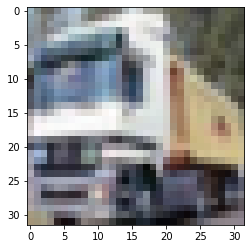

In [4]:
for image, label in train_dataset.take(2):
    plt.figure()
    plt.imshow(image)

이미지 키우기는 작업

In [5]:
IMG_SIZE = 160

def change_format(image, label): 
  image = tf.cast(image, tf.float32)
  image = image / 255.
  image = tf.image.resize(image, (IMG_SIZE, IMG_SIZE))
  return image, label

In [6]:
train_dataset = train_dataset.map(change_format)
test_dataset = test_dataset.map(change_format)

이미지 사이즈 변경 후 데이터 확인

In [7]:
data = train_dataset.take(1)
data

<TakeDataset shapes: ((160, 160, 3), (1,)), types: (tf.float32, tf.uint8)>

In [8]:
train_dataset.element_spec

(TensorSpec(shape=(160, 160, 3), dtype=tf.float32, name=None),
 TensorSpec(shape=(1,), dtype=tf.uint8, name=None))

# VGG16 구현

In [9]:
vgg16 = keras.applications.VGG16(weights=None, input_shape=(160, 160, 3))

1000개를 분류하는 vgg16을 가져옴

In [10]:
vgg16.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 160, 160, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 160, 160, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 160, 160, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 80, 80, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 80, 80, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 80, 80, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 40, 40, 128)       0     

In [11]:
model = keras.applications.VGG16(input_shape=(160, 160, 3), weights=None, include_top=False)

In [12]:
model.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 160, 160, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 160, 160, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 160, 160, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 80, 80, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 80, 80, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 80, 80, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 40, 40, 128)       0     

In [13]:
new_model = keras.Sequential()
new_model.add(model)
new_model.add(keras.layers.Flatten())
new_model.add(keras.layers.Dense(4096, activation='swish'))
new_model.add(keras.layers.Dense(4096, activation='swish'))
new_model.add(keras.layers.Dense(10, activation='softmax', name='predications'))

마지막 분류가 10으로 변경

In [14]:
new_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Functional)           (None, 5, 5, 512)         14714688  
_________________________________________________________________
flatten (Flatten)            (None, 12800)             0         
_________________________________________________________________
dense (Dense)                (None, 4096)              52432896  
_________________________________________________________________
dense_1 (Dense)              (None, 4096)              16781312  
_________________________________________________________________
predications (Dense)         (None, 10)                40970     
Total params: 83,969,866
Trainable params: 83,969,866
Non-trainable params: 0
_________________________________________________________________


In [15]:
train_dataset = train_dataset.shuffle(1000).batch(64)
test_dataset = test_dataset.batch(64)

In [ ]:
new_model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
new_model.fit(train_dataset, epochs=10)

Epoch 1/10
460/782 [================>.............] - ETA: 1:16 - loss: 2.3027 - accuracy: 0.0962